### Configuration and Importing Of Modules

In [2]:
# Used for modification of data
import numpy as np
import pandas as pd 

# Graphing
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import seaborn as sns
import matplotlib.pyplot as plt

# Config of pandas module and matplotlib in terms of displaying data
%matplotlib inline
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## House Data Overview

In [5]:
# Basic Information on our dataset which we will use

house_data = pd.read_csv("/kaggle/input/edmonton-neighborhood-and-housing-data/edmonton_housing_data_Feb15_2022.csv")

# Fairly long dataset
print(house_data.shape)


(1697, 54)


In [6]:
# We will have to do lots of processing and feature engineering to be able to make this work well
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Link                  1697 non-null   object 
 1   House Description     1697 non-null   object 
 2   MLS® #                1697 non-null   object 
 3   Price                 1697 non-null   object 
 4   Bedrooms              1697 non-null   int64  
 5   Bathrooms             1697 non-null   float64
 6   Full Baths            1677 non-null   float64
 7   Square Footage        1697 non-null   object 
 8   Acres                 1697 non-null   float64
 9   Year Built            1697 non-null   int64  
 10  Type                  1697 non-null   object 
 11  Sub-Type              1697 non-null   object 
 12  Style                 1697 non-null   object 
 13  Address               1697 non-null   object 
 14  Area                  1697 non-null   object 
 15  Community            

## House Data Formatting and Removal
##### Usually data exploration is conducted. However, I collected this data myself so I already have a good understanding of it and have worked with it in a different Juypter File

In [7]:



# # Drop duplicate rows
house_data = house_data.applymap(lambda s: s.lower().strip() if type(s) == str else s)
house_data.drop_duplicates(inplace=True)

# # Combine half baths and full baths into a float integer
house_data["Half Baths"] = house_data["Half Baths"].replace(np.nan, 0)
house_data["Full Baths"] = house_data["Full Baths"].replace(np.nan, 0)
house_data["Bathrooms"] = house_data["Full Baths"] + (house_data["Half Baths"]/2)

# Combine Condo Fee + HOA Fee and format it correctly
house_data["House Fee"] = pd.to_numeric(house_data["Condo Fee"].replace({np.nan:"0"}).str.replace("[$,]", "", regex=True)) \
+ pd.to_numeric(house_data["HOA Fees"].replace({np.nan:"0"}).str.replace("[$,]", "", regex=True))
house_data["House Fee"] = house_data["House Fee"].replace({np.nan:0})

# Check the house description for the substring "renov", if it is found then the house is rennovated. Binary formatting
house_data["Renovated"] = house_data["House Description"].map(lambda x: 1 if "renov" in x else 0)

# Translating yes/no into binary
house_data["RE / Bank Owned"] = house_data["RE / Bank Owned"].replace({"no":0, "yes":1})
house_data["Fireplace"] = house_data["Fireplaces"].replace({"no":0, np.nan:0, "^.*":1}, regex=True)
house_data["Is Waterfront"] = house_data["Is Waterfront"].replace({"no":0, "yes":1})
house_data["Has Basement"] = house_data["Has Basement"].replace({"no": 0, "yes": 1})
house_data["Has Pool"] = house_data["Has Pool"].replace({"no":0, "yes":1})
house_data["Separate Entrance"] = house_data["Separate Entrance"].replace({"no":0, "yes":1})

# # Formatting into clean numbers

house_data["Price"] = pd.to_numeric(house_data["Price"].str.replace("[$,]", "", regex=True))
house_data["Square Footage"] = pd.to_numeric(house_data["Square Footage"].str.replace(",", ""))
house_data["# of Garages"] = pd.to_numeric(house_data["# of Garages"].replace({np.nan:0, "4+":"", "9+":"9"}))
house_data["# of Garages"] = house_data["# of Garages"].replace({np.nan:0})

# Cleaning categorical data and making sure that categories don't overlap

house_data["Style"] = house_data["Style"].replace({"hillside bungalow":"bungalow", "raised bungalow":"bungalow"}, regex=True)
house_data["Construction"] = house_data["Construction"].replace({"unknown":np.nan, "insulated concrete":"concrete", "see remarks":np.nan})
house_data["Foundation"] = house_data["Foundation"].replace({"concrete slab":"concrete", "see remarks":np.nan, "brick/stone/block":"block", "insulated concrete form":"concrete", "piling":"wood", "preserved wood":"wood"})


concrete    1667
block         15
wood           6
Name: Foundation, dtype: int64


In [8]:
# Dropping all columns based on use of information, relevancy and what improves model accuracy
# Adjusted this a lot during the project to improve model accuracy


house_data.drop(["Link", "House Description", "MLS® #", "Full Baths",
                 "Half Baths",
                "Bedrooms Above Grade", "Address", "Area", "Condo", "City",
                 "County", "Province", "Postal Code", "Features", 
                 "Parking Spaces", "Parking","Interior Features", 
                 "Exterior Features", "Elementary", "Middle", "High",
                 "Foreclosure", "Garages", "Zoning", "Lot Description",
                 "HOA Fees", "Condo Fee", "HOA Fees Freq.", "Fireplaces", "Basement", "Exterior",
                "Interior", "Office", "Heating"] , axis=1 , inplace=True)

house_data.info()

# All null values have been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 1696
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              1697 non-null   int64  
 1   Bedrooms           1697 non-null   int64  
 2   Bathrooms          1697 non-null   float64
 3   Square Footage     1697 non-null   int64  
 4   Acres              1697 non-null   float64
 5   Year Built         1697 non-null   int64  
 6   Type               1697 non-null   object 
 7   Sub-Type           1697 non-null   object 
 8   Style              1697 non-null   object 
 9   Community          1697 non-null   object 
 10  Is Waterfront      1697 non-null   int64  
 11  Has Pool           1697 non-null   int64  
 12  Fireplace          1697 non-null   int64  
 13  # of Stories       1697 non-null   int64  
 14  Has Basement       1697 non-null   int64  
 15  Separate Entrance  1697 non-null   int64  
 16  Construction       1694 

## Neighborhood Data Formatting and Removal

In [10]:
# Merging of csv file containing neighborhood data with house dataframe on respective rows

neigh_data = pd.read_csv("/kaggle/input/edmonton-neighborhood-and-housing-data/neigh_data_Feb15_2023.csv")

neigh_data = neigh_data.rename(columns={"neigh_name":"Community"})
neigh_house_data = pd.merge(house_data, neigh_data, on='Community')

# Dropping more columns, again based on what I saw thourghout the model training
neigh_house_data.drop(["alberta_rank", "percent_rank", "eng_only", "french_only", "Community", "ammenities_grade"], inplace=True, \
                      axis=1)


In [11]:
# Formatting of appended data, to convert into a number later

neigh_house_data["edmonton_rank"] = neigh_house_data["edmonton_rank"].replace("#","", regex=True)
neigh_house_data["crime_rate"] = neigh_house_data["crime_rate"].replace(",","", regex=True)
neigh_house_data["median_income"] = neigh_house_data["median_income"].str.replace("[$,]", "", regex=True)
neigh_house_data["in_labor_force"] = neigh_house_data["in_labor_force"].str.replace("[%]", "", regex=True)
neigh_house_data["unemployment_rate"] = neigh_house_data["unemployment_rate"].replace("%","", regex=True)
neigh_house_data["median_house_val"] = neigh_house_data["median_house_val"].replace("[$,]","", regex=True)
neigh_house_data["home_owner_percent"] = neigh_house_data["home_owner_percent"].replace("%","", regex=True)
neigh_house_data["high_school_percent"] = neigh_house_data["high_school_percent"].replace("%","", regex=True)
neigh_house_data["bach_degree"] = neigh_house_data["bach_degree"].replace("%","", regex=True)
neigh_house_data["area_pop"] = neigh_house_data["area_pop"].replace(",","", regex=True)

neigh_house_data["pop_dense"] = neigh_house_data["pop_dense"].replace(",", "", regex=True)
neigh_house_data["marri_coup"] = neigh_house_data["marri_coup"].replace("%","", regex=True)
neigh_house_data["fam_w_kids"] = neigh_house_data["fam_w_kids"].replace("%","", regex=True)

neigh_house_data["test_scores"] = neigh_house_data["test_scores"].replace("%","", regex=True)


In [12]:
# LabelEndcoing (Converting category data into ) the more complex way in order to save time later 
# We will need to load up instances of it to convert user input

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
  
labelencoder = LabelEncoder()
tempDf = neigh_house_data[["Type", "Sub-Type", "Style", "Construction", "Foundation", "male_to_fem"]]
lbn = defaultdict(LabelEncoder)

# Apply label encoder to the entire dataframe
tempDf = tempDf.apply(lambda x: lbn[x.name].fit_transform(x))

neigh_house_data["Type"] = tempDf["Type"]
neigh_house_data["Sub-Type"] = tempDf["Sub-Type"]
neigh_house_data["Style"] = tempDf["Style"]
neigh_house_data["Construction"] = tempDf["Construction"]
neigh_house_data["Foundation"] = tempDf["Foundation"]
neigh_house_data["male_to_fem"] = tempDf["male_to_fem"]


In [13]:
# Convert everything to a numeric value and ensure that we do not have any NA's left

neigh_house_data.dropna(axis='rows', inplace=True)
neigh_house_data = neigh_house_data.apply(pd.to_numeric)
neigh_house_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1288 entries, 0 to 1666
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   1288 non-null   int64  
 1   Bedrooms                1288 non-null   int64  
 2   Bathrooms               1288 non-null   float64
 3   Square Footage          1288 non-null   int64  
 4   Acres                   1288 non-null   float64
 5   Year Built              1288 non-null   int64  
 6   Type                    1288 non-null   int64  
 7   Sub-Type                1288 non-null   int64  
 8   Style                   1288 non-null   int64  
 9   Is Waterfront           1288 non-null   int64  
 10  Has Pool                1288 non-null   int64  
 11  Fireplace               1288 non-null   int64  
 12  # of Stories            1288 non-null   int64  
 13  Has Basement            1288 non-null   int64  
 14  Separate Entrance       1288 non-null   

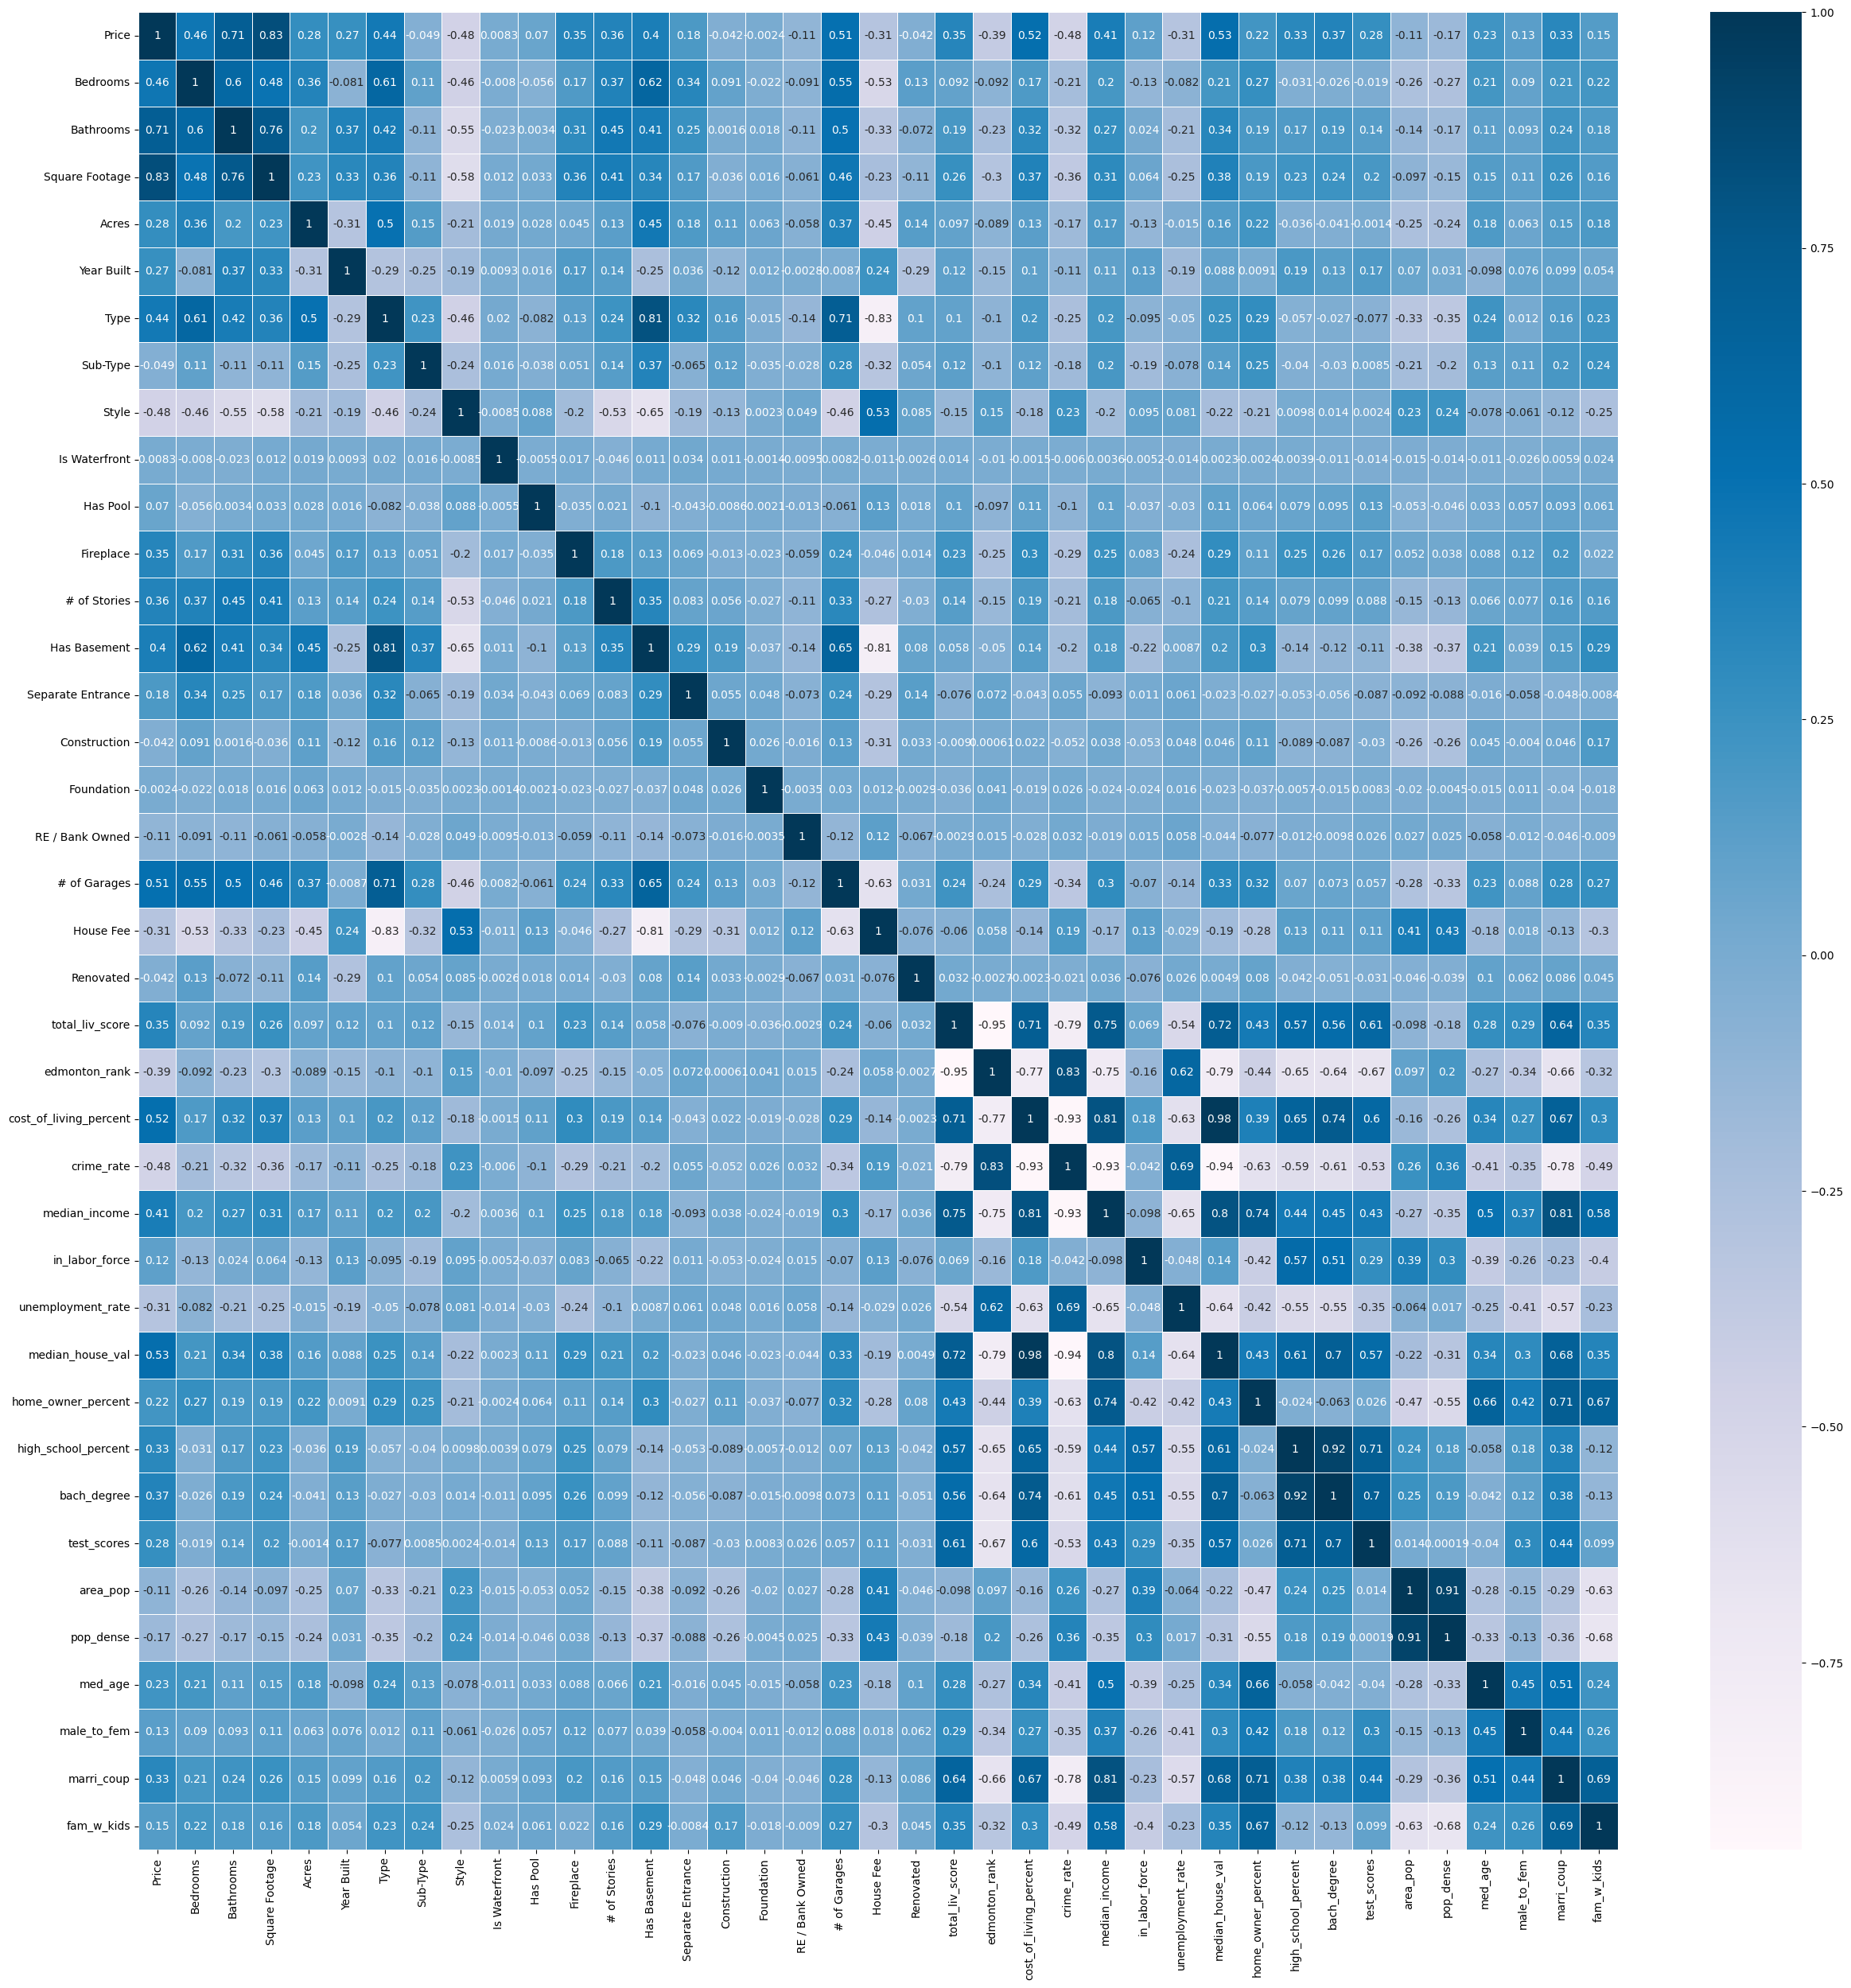

In [14]:
# Final check to remove useless features

plt.figure(figsize=(30,30))
correlationGraph = neigh_house_data.corr()
sns.heatmap(correlationGraph,annot=True, cmap=plt.cm.PuBu, linewidths=.5)
plt.show()

## Training Models

In [16]:
from sklearn.model_selection import train_test_split

# Seperating x's from the y-val (dependent)
x = neigh_house_data.drop("Price", axis = 1)
y = neigh_house_data["Price"]

# Spliting up data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)



In [17]:
from sklearn.linear_model import *



# Linear Regression

lr = LinearRegression()
lr.fit(x_train, y_train)

# Everything below this, is esentially just different forms of linear regression 


# Ridge Regression

ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)

# Lasso Regression

lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)

# Bayesian Regression

bayesian = BayesianRidge()
bayesian.fit(x_train, y_train)

# ElasticNet Regression

en = ElasticNet(alpha = 0.01)
en.fit(x_train, y_train)

# Printing model accuracies

print(f"Linear Regression Score: {lr.score(x_test, y_test)}")
print(f"Ridge Regression Score: {ridge.score(x_test, y_test)}")
print(f"Lasso Regression Score: {lasso.score(x_test, y_test)}")
print(f"Bayesian Regression Score: {bayesian.score(x_test, y_test)}")
print(f"Elastic Net Regression{en.score(x_test, y_test)}")

# We can do better then that! (Hopefully)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+13, tolerance: 1.530e+10
  model = cd_fast.enet_coordinate_descent(


Linear Regression Score: 0.862657731096221
Ridge Regression Score: 0.8627628403173341
Lasso Regression Score: 0.8626577678407926
Bayesian Regression Score: 0.8323579862250516
Elastic Net Regression0.8626026070776882


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e+13, tolerance: 1.530e+10
  model = cd_fast.enet_coordinate_descent(


In [360]:
from sklearn.ensemble import RandomForestRegressor

# This is similar to the GradientBoostingRegressor, except this uses multiple descions trees to not for a model, but uses these
# to find the average/ result. I am again using GridSearchCV to find the best parameters to tune this algorithim

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}


CV_rfc = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

print(CV_rfc.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [361]:

rf = RandomForestRegressor(max_depth = 8, n_estimators = 200, max_features="sqrt").fit(x_train, y_train)
print(rf.score(x_test,y_test))
print(mean_absolute_percentage_error(y_test, rf.predict(x_test)))

0.8735836274269883

0.20549055449431114


In [362]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

# GradientBoostingRegressor is the next model I tried. It uses decision trees in a combination with regressor algorithims to build 
# off of previous models and improve them. I used GridSearchCV, in order to find the best "tuning" parameters for the algorithim

parameters = {'learning_rate': [0.01,0.001, 0.0001],
              'subsample': [0.9, 0.5, 0.2,],
              'n_estimators': [100,500,1000],
              'max_depth': [4, 8]
                 }


grid_GBR = GridSearchCV(estimator=ensemble.GradientBoostingRegressor(), param_grid = parameters, n_jobs=-1, cv=2)
grid_GBR.fit(x_train, y_train)

print(grid_GBR.best_params_)

Fitting 2 folds for each of 81 candidates, totalling 162 fits

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.2}


In [419]:
gbr = ensemble.GradientBoostingRegressor(n_estimators=1000, max_depth = 8, learning_rate=0.01, subsample=0.5)
gbr.fit(x_train, y_train)

print(f"The accuracy of GBR is: {gbr.score(x_test,y_test)}")
print(f"The mean absolute precentage error is: {mean_absolute_percentage_error(y_test, gbr.predict(x_test))}")



The accuracy of GBR is: 0.9244456691420171

The mean absolute precentage error is: 0.14354928963702632


In [373]:

xgb1 = xg.XGBRegressor()

# AKA extremeGradientBoosting, is a faster and more regularized (meaning it may have the higher ability to generalize 
# which can be good for accuracy)

# It is esentially a version of regular gradient boosting, gave it a shot to see if I could increase accuracy even slightly 

parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'gamma':[1.5, 2, 6],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7, 0.5],
              'colsample_bytree': [0.7, 0.2],
              'n_estimators': [500, 1000]} 

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,
         y_train)

print(xgb_grid.best_params_)

Fitting 2 folds for each of 216 candidates, totalling 432 fits

[16:16:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.

{'colsample_bytree': 0.7, 'gamma': 1.5, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.5}


In [380]:
import xgboost as xg
from sklearn.metrics import mean_absolute_percentage_error

XGB = xg.XGBRegressor(param={'colsample_bytree': 0.7, 'gamma':1.5, 'learning_rate': 0.03, 'max_depth': 6, \
                               'min_child_weight': 4, 'n_estimators': 500, 'nthread': 8, 'objective': 'reg:linear', \
                               'subsample': 0.5},).fit(x_train,y_train)

print(f"XGB has a accuracy score of:  {model.score(x_test, y_test)}")
print(f"XGB has a percentage error of: {mean_absolute_percentage_error(y_test, model.predict(x_test))}")



[16:18:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 

Parameters: { "param" } are not used.



XGB has a accuracy score of:  0.9106284823981621

XGB has a percentage error of: 0.15508827510459053


## Saving Models and Encoders

In [420]:
import joblib
import pickle

# Saving our most accurate model, GBR

joblib.dump(gbr, 'House_GBR_Feb15_2023.pkl')
ridge_from_joblib = model = joblib.load("House_GBR_Feb15_2023.pkl")

# Saving our encoders so we can use them later

pickle.dump(lbn, open("label_encoder_Feb15_2023.pkl", "wb"))
